In [165]:
# importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
# Importing a dataset
df = pd.read_csv("/content/tested.csv")

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [168]:
# Rearranging Columns
new_order = ["Name","PassengerId","Sex","Embarked","Pclass","Age","SibSp","Parch","Ticket","Fare","Cabin","Survived"]
df = df[new_order]

In [169]:
df.head()

,Name,PassengerId,Sex,Embarked,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,"Kelly, Mr. James",892,male,Q,3,34.5,0,0,330911,7.8292,NaN,0
1,"Wilkes, Mrs. James (Ellen Needs)",893,female,S,3,47.0,1,0,363272,7.0000,NaN,1
2,"Myles, Mr. Thomas Francis",894,male,Q,2,62.0,0,0,240276,9.6875,NaN,0
3,"Wirz, Mr. Albert",895,male,S,3,27.0,0,0,315154,8.6625,NaN,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,female,S,3,22.0,1,1,3101298,12.2875,NaN,1


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         418 non-null    object 
 1   PassengerId  418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Embarked     418 non-null    object 
 4   Pclass       418 non-null    int64  
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [171]:
# Handling missing value

In [172]:
mean_age = df["Age"].mean()
df["Age"].fillna(mean_age,inplace=True)
mean_Fare = df["Fare"].mean()
df["Fare"].fillna(mean_Fare,inplace = True)

In [173]:
df.isnull().sum()

,0
Name,0
PassengerId,0
Sex,0
Embarked,0
Pclass,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Pclass', ylabel='Age'>

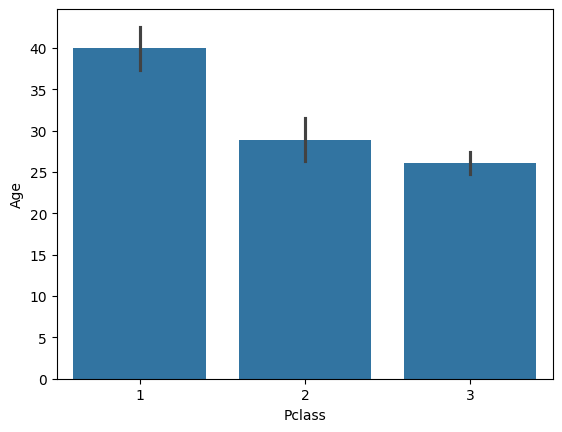

In [174]:
sns.barplot(x = "Pclass",y = "Age",data = df)

<Axes: ylabel='Age'>

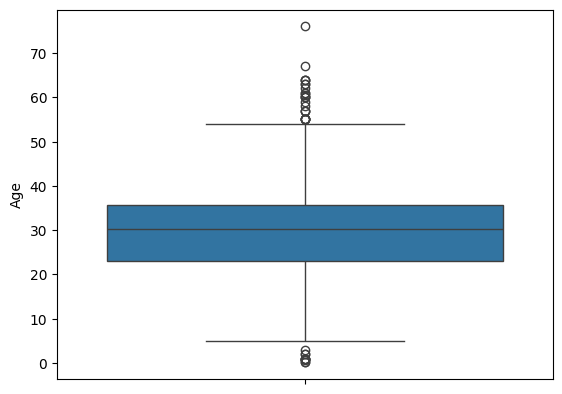

In [175]:
sns.boxplot(df["Age"])

<Axes: xlabel='Survived'>

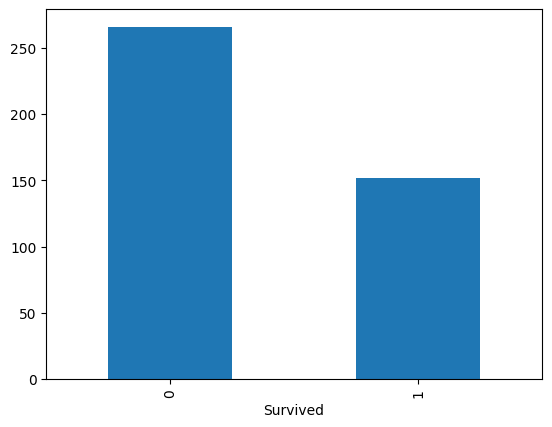

In [176]:
df["Survived"].value_counts().plot(kind = "bar")

<Axes: ylabel='count'>

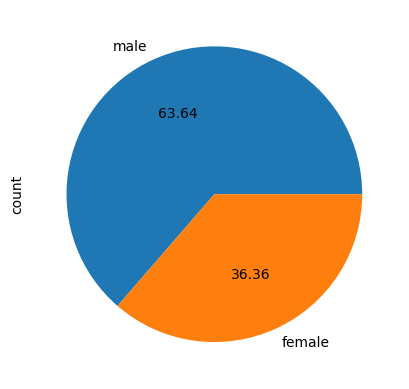

In [177]:
df["Sex"].value_counts().plot(kind = "pie", autopct = "%.2f")

<Axes: ylabel='count'>

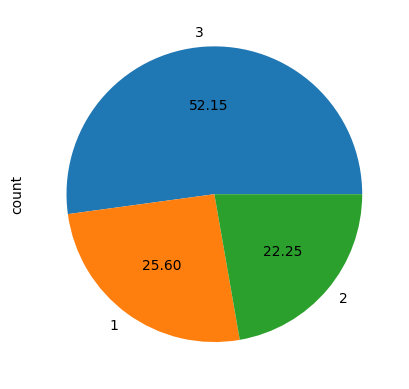

In [178]:
df["Pclass"].value_counts().plot(kind = "pie", autopct ="%.2f")

<Axes: xlabel='Survived', ylabel='Pclass'>

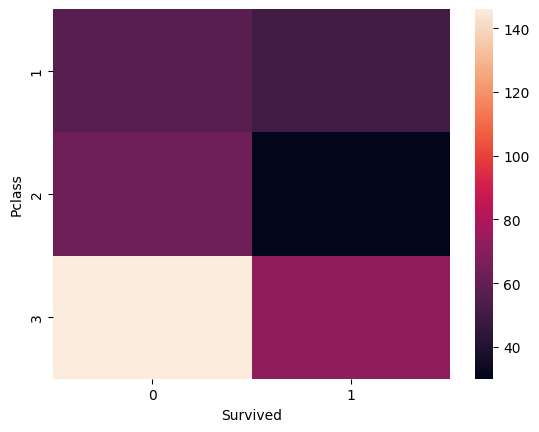

In [179]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
#Encoding Categorical Sex Data into Numeric Form
a = df.iloc[:,[2]]
from sklearn.preprocessing import OrdinalEncoder
os = OrdinalEncoder(categories = [['male',"female"]])
os.fit(a)
x_train_Sex = os.transform(a)
df.pop("Sex")
df.insert(2,"Sex",x_train_Sex)

In [182]:
#Nominal Encoding When data do not follow any order
Embarked_dummies=pd.get_dummies(df.iloc[:,2],columns = ["Embarked"],drop_first = True)

In [183]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = "first", sparse = False, dtype = np.int32)
x_train_Embarked = ohe.fit_transform(Embarked_dummies)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [184]:
df.pop("Embarked")
df.insert(3,"Embarked",x_train_Embarked)

In [185]:
df.head()


,Name,PassengerId,Sex,Embarked,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived
0,"Kelly, Mr. James",892,0.0,0,3,34.5,0,0,330911,7.8292,NaN,0
1,"Wilkes, Mrs. James (Ellen Needs)",893,1.0,1,3,47.0,1,0,363272,7.0000,NaN,1
2,"Myles, Mr. Thomas Francis",894,0.0,0,2,62.0,0,0,240276,9.6875,NaN,0
3,"Wirz, Mr. Albert",895,0.0,0,3,27.0,0,0,315154,8.6625,NaN,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,1.0,1,3,22.0,1,1,3101298,12.2875,NaN,1


In [186]:
x = df.iloc[:,2:8]
y = df.iloc[:,-1]

In [187]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 20)
x_train

,Sex,Embarked,Pclass,Age,SibSp,Parch
375,1.0,1,1,45.00000,0,0
95,0.0,0,3,25.00000,0,0
206,1.0,1,3,35.00000,0,0
352,0.0,0,2,18.00000,0,0
117,1.0,1,3,1.00000,1,1
...,...,...,...,...,...,...
218,1.0,1,1,50.00000,1,1
412,1.0,1,3,28.00000,0,0
223,0.0,0,3,21.00000,0,0
271,0.0,0,3,30.27259,0,0


In [188]:
# Scale the value
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train


array([[ 1.28551249,  1.28551249, -1.45552317,  1.14255448, -0.52429867,
        -0.37778793],
       [-0.77789987, -0.77789987,  0.89282092, -0.43644379, -0.52429867,
        -0.37778793],
       [ 1.28551249,  1.28551249,  0.89282092,  0.35305534, -0.52429867,
        -0.37778793],
       ...,
       [-0.77789987, -0.77789987,  0.89282092, -0.75224345, -0.52429867,
        -0.37778793],
       [-0.77789987, -0.77789987,  0.89282092, -0.02017324, -0.52429867,
        -0.37778793],
       [-0.77789987, -0.77789987, -1.45552317,  1.53730405, -0.52429867,
        -0.37778793]])

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
clf = LogisticRegression()

In [192]:
clf.fit(x_train,y_train)

LogisticRegression()

In [193]:
y_pred = clf.predict(x_test)
y_test

,Survived
315,1
174,0
13,0
121,0
129,0
...,...
0,0
21,0
405,0
35,0


In [194]:
# Check Accuracy
from sklearn.metrics import accuracy_score

In [195]:
accuracy=accuracy_score(y_test,y_pred)


In [196]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%
